In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



Import data folder

In [2]:
notebookDir = os.getcwd()
dataDir = os.path.join(notebookDir, "..", "data")
dataDir = os.path.normpath(dataDir)  # normalizes slashes
print(f"Notebook Directory: {notebookDir}")
print(f"Data Directory: {dataDir}")

Notebook Directory: z:\Projects\Smart Portfolio\notebook
Data Directory: z:\Projects\Smart Portfolio\data


Extract data from data folder

In [3]:

stockData = {}

for i in os.listdir(dataDir):
    if i.endswith("_data.csv"):
        symbol = i.replace("_data.csv", "")
        df = stockData[symbol] = pd.read_csv(os.path.join(dataDir, i))
        df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # convert to datetime with UTC
        df.set_index('timestamp', inplace=True)
        df.sort_index(inplace=True)

print(f"Loaded data for {len(stockData)} stocks.")
print(f"Stocks are {list(stockData.keys())}")

Loaded data for 10 stocks.
Stocks are ['AAPL', 'AMZN', 'COST', 'CRWD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SHOP', 'TSLA']


plot basic price progression

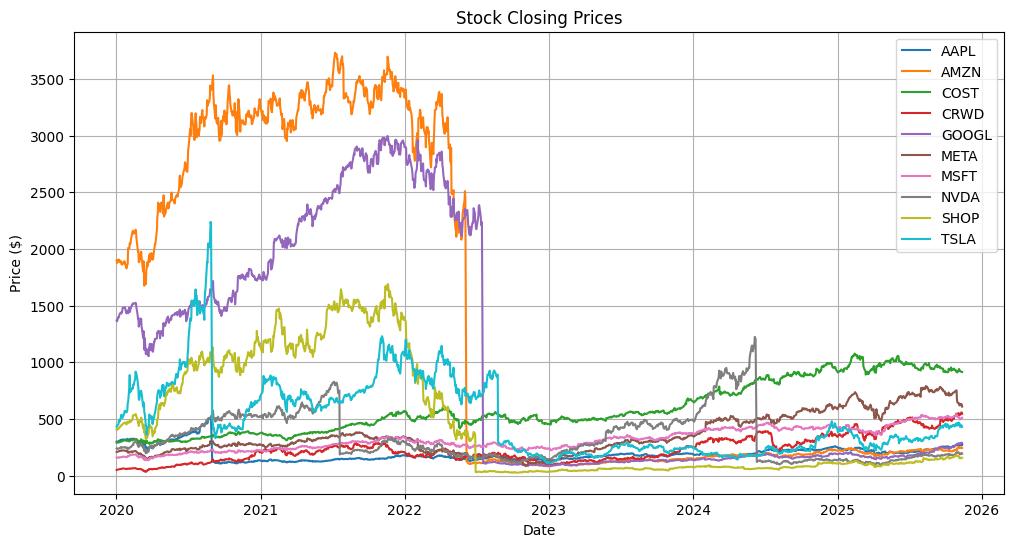

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

for symbol, df in stockData.items():
        
        ax.plot(df.index, df['close'], label=symbol)
    

ax.set(
    xlabel="Date",
    ylabel="Price ($)",
    title="Stock Closing Prices"
)
ax.grid(True)
ax.legend()

#Save figure
#fig.savefig("portfolio_stocks.png", dpi=300)

plt.show()

The high prices is due to alpaca not account for stock split

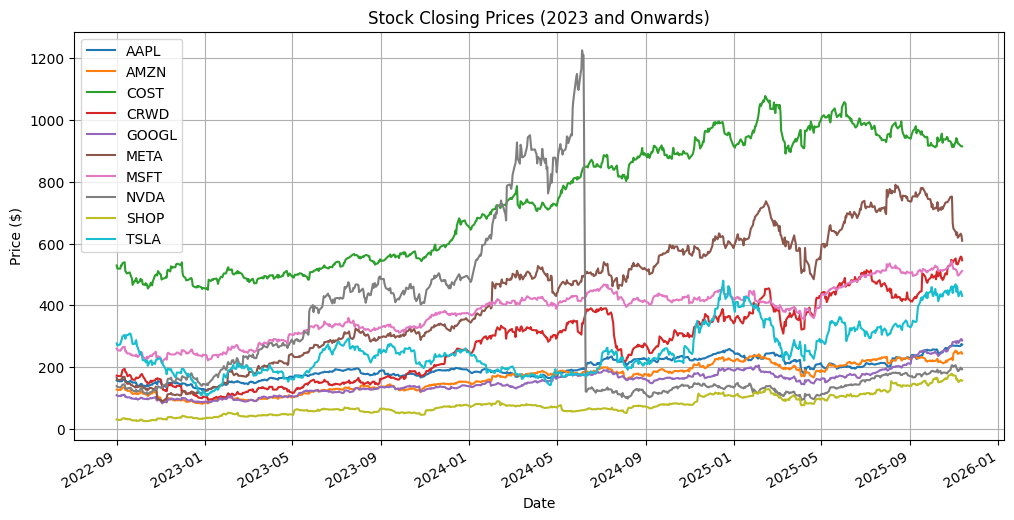

In [5]:
start_date = pd.Timestamp("2022-09-01", tz="UTC") 

fig, ax = plt.subplots(figsize=(12, 6))
for symbol, df in stockData.items():
    df_filtered = df[df.index >= start_date]
    
    ax.plot(df_filtered.index, df_filtered['close'], label=symbol)

ax.set(
    xlabel="Date",
    ylabel="Price ($)",
    title="Stock Closing Prices (2023 and Onwards)"
)
ax.grid(True)
ax.legend()


fig.autofmt_xdate()
plt.show()

Can see nvidia's june 10th 2024 10-for-1 stock split

"Companies split their stock to make shares more affordable and increase trading liquidity by lowering the price per share, which can also signal confidence in future growth. A stock split does not change the company's overall market value or an investor's total investment value; it simply divides the existing shares into more shares, similar to exchanging a \(\$100\) bill for two \(\$50\) bills. "

